## City_Wise AQI analysis and predictor model

### Sagnik Mukherjee

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor as xgbr
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('city_wise_hourly_wise_aqi.csv')
print(df.shape)
df.head()

(129277, 17)


,Unnamed: 0,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,50888,Amaravati,2017-11-25 09:00:00,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,117.62,0.30,10.40,0.23,155.0,Moderate
1,50889,Amaravati,2017-11-25 10:00:00,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,136.23,0.28,7.10,0.15,159.0,Moderate
2,50890,Amaravati,2017-11-25 11:00:00,82.75,126.50,1.47,14.83,9.07,9.70,0.1,15.40,149.92,0.20,4.55,0.08,173.0,Moderate
3,50893,Amaravati,2017-11-25 14:00:00,68.50,117.00,1.35,13.60,8.35,7.40,0.1,21.80,161.70,0.10,2.30,0.00,191.0,Moderate
4,50894,Amaravati,2017-11-25 15:00:00,69.25,112.25,1.52,11.80,7.55,9.25,0.1,21.38,161.68,0.10,2.35,0.00,191.0,Moderate


In [3]:
df1 = df.drop(df[['Unnamed: 0']], axis = 1)
df1.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Amaravati,2017-11-25 09:00:00,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,117.62,0.30,10.40,0.23,155.0,Moderate
1,Amaravati,2017-11-25 10:00:00,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,136.23,0.28,7.10,0.15,159.0,Moderate
2,Amaravati,2017-11-25 11:00:00,82.75,126.50,1.47,14.83,9.07,9.70,0.1,15.40,149.92,0.20,4.55,0.08,173.0,Moderate
3,Amaravati,2017-11-25 14:00:00,68.50,117.00,1.35,13.60,8.35,7.40,0.1,21.80,161.70,0.10,2.30,0.00,191.0,Moderate
4,Amaravati,2017-11-25 15:00:00,69.25,112.25,1.52,11.80,7.55,9.25,0.1,21.38,161.68,0.10,2.35,0.00,191.0,Moderate


In [4]:
df1[['Datetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129277 entries, 0 to 129276
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Datetime  129277 non-null  object
dtypes: object(1)
memory usage: 1010.1+ KB


In [5]:
df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df1.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Amaravati,2017-11-25 09:00:00,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,117.62,0.30,10.40,0.23,155.0,Moderate
1,Amaravati,2017-11-25 10:00:00,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,136.23,0.28,7.10,0.15,159.0,Moderate
2,Amaravati,2017-11-25 11:00:00,82.75,126.50,1.47,14.83,9.07,9.70,0.1,15.40,149.92,0.20,4.55,0.08,173.0,Moderate
3,Amaravati,2017-11-25 14:00:00,68.50,117.00,1.35,13.60,8.35,7.40,0.1,21.80,161.70,0.10,2.30,0.00,191.0,Moderate
4,Amaravati,2017-11-25 15:00:00,69.25,112.25,1.52,11.80,7.55,9.25,0.1,21.38,161.68,0.10,2.35,0.00,191.0,Moderate


In [6]:
df1['Year'] = df1['Datetime'].dt.year
df1['Month'] = df1['Datetime'].dt.month
df1['Day'] = df1['Datetime'].dt.day
df1['Hour'] = df1['Datetime'].dt.hour
df1.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day,Hour
0,Amaravati,2017-11-25 09:00:00,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,117.62,0.30,10.40,0.23,155.0,Moderate,2017,11,25,9
1,Amaravati,2017-11-25 10:00:00,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,136.23,0.28,7.10,0.15,159.0,Moderate,2017,11,25,10
2,Amaravati,2017-11-25 11:00:00,82.75,126.50,1.47,14.83,9.07,9.70,0.1,15.40,149.92,0.20,4.55,0.08,173.0,Moderate,2017,11,25,11
3,Amaravati,2017-11-25 14:00:00,68.50,117.00,1.35,13.60,8.35,7.40,0.1,21.80,161.70,0.10,2.30,0.00,191.0,Moderate,2017,11,25,14
4,Amaravati,2017-11-25 15:00:00,69.25,112.25,1.52,11.80,7.55,9.25,0.1,21.38,161.68,0.10,2.35,0.00,191.0,Moderate,2017,11,25,15


In [7]:
df2 = df1.drop(df1[['Datetime']], axis = 1)
df2.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day,Hour
0,Amaravati,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,117.62,0.30,10.40,0.23,155.0,Moderate,2017,11,25,9
1,Amaravati,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,136.23,0.28,7.10,0.15,159.0,Moderate,2017,11,25,10
2,Amaravati,82.75,126.50,1.47,14.83,9.07,9.70,0.1,15.40,149.92,0.20,4.55,0.08,173.0,Moderate,2017,11,25,11
3,Amaravati,68.50,117.00,1.35,13.60,8.35,7.40,0.1,21.80,161.70,0.10,2.30,0.00,191.0,Moderate,2017,11,25,14
4,Amaravati,69.25,112.25,1.52,11.80,7.55,9.25,0.1,21.38,161.68,0.10,2.35,0.00,191.0,Moderate,2017,11,25,15


In [8]:
le = LabelEncoder()
df2['AQI_Bucket'] = le.fit_transform(df2[['AQI_Bucket']].values.ravel())
df2.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day,Hour
0,Amaravati,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,117.62,0.30,10.40,0.23,155.0,1,2017,11,25,9
1,Amaravati,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,136.23,0.28,7.10,0.15,159.0,1,2017,11,25,10
2,Amaravati,82.75,126.50,1.47,14.83,9.07,9.70,0.1,15.40,149.92,0.20,4.55,0.08,173.0,1,2017,11,25,11
3,Amaravati,68.50,117.00,1.35,13.60,8.35,7.40,0.1,21.80,161.70,0.10,2.30,0.00,191.0,1,2017,11,25,14
4,Amaravati,69.25,112.25,1.52,11.80,7.55,9.25,0.1,21.38,161.68,0.10,2.35,0.00,191.0,1,2017,11,25,15


In [9]:
pd.unique(df2['AQI_Bucket'])

array([1, 2, 5, 3, 0, 4])

In [10]:
#Let us split the data for OneHotencoding and numerical analysis

df_ohe = df2[['City']]
df_num = df2.drop(df2[['City']], axis=1)

In [11]:
df_dummies = pd.get_dummies(df_ohe)
df_dummies.head()

,City_Amaravati,City_Amritsar,City_Chandigarh,City_Delhi,City_Gurugram,City_Hyderabad,City_Kolkata,City_Patna,City_Visakhapatnam
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [12]:
#To avoid the dummy variable trap that may lead to multi-collinearity, we drop the last column...
df_dummies = df_dummies.drop(df_dummies[['City_Visakhapatnam']],axis=1)
df_dummies.head()

,City_Amaravati,City_Amritsar,City_Chandigarh,City_Delhi,City_Gurugram,City_Hyderabad,City_Kolkata,City_Patna
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [13]:
#In our df_num dataset we have two target variables. We will have to treat them individually...
df_aqi = df_num.drop(df_num[['AQI_Bucket']], axis=1)
df_bucket = df_num.drop(df_num[['AQI']], axis=1)

(17.5, -0.5)

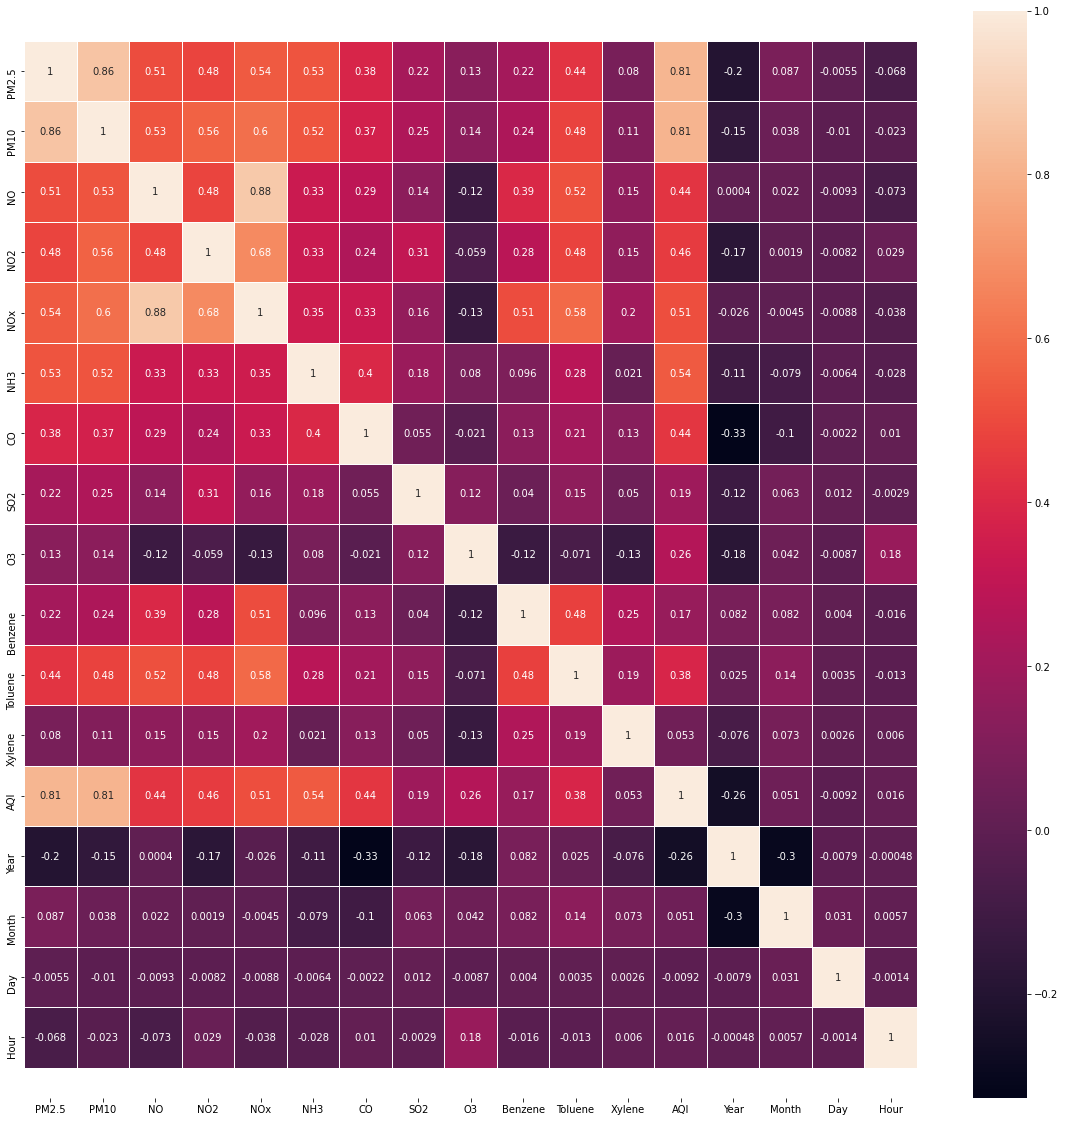

In [14]:
plt.figure(figsize = (20,20))

ax = sns.heatmap(df_aqi.corr(), annot=True, linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

1. Keeping a threshold of (+-)30%, let us select the features which would further be used for analysis. The features we'll drop are: 'Hour', 'Day', 'Month', 'Year', 'Xylene', 'Benzene' and 'SO2' as they are correlated to the target variable by less than (+-)30%.
2. Now, we see that some features show high correlations amongst each other (>+-50%). For them, we shall use only one (the one which is most correlated to the target variable) and drop the other. So, some features we can drop are NO (NOx can be used in place of it) and same can be done with PM2.5, PM10 (keeping only PM10).

In [15]:
df_aqi = df_aqi.drop(df_aqi[['Hour', 'Day', 'Month', 'Xylene', 'Benzene', 'SO2',
                             'NO', 'PM2.5', 'Year']], axis=1)
df_aqi

,PM10,NO2,NOx,NH3,CO,O3,Toluene,AQI
0,148.50,23.00,13.75,9.80,0.10,117.62,10.40,155.0
1,142.00,16.25,9.75,9.65,0.10,136.23,7.10,159.0
2,126.50,14.83,9.07,9.70,0.10,149.92,4.55,173.0
3,117.00,13.60,8.35,7.40,0.10,161.70,2.30,191.0
4,112.25,11.80,7.55,9.25,0.10,161.68,2.35,191.0
...,...,...,...,...,...,...,...,...
129272,45.00,17.20,9.32,9.12,0.11,45.80,0.00,50.0
129273,36.75,17.75,10.28,4.65,0.34,50.73,0.00,51.0
129274,30.25,13.75,8.07,4.67,0.30,41.55,0.00,51.0
129275,29.50,20.70,12.45,8.08,0.45,39.23,0.00,51.0


In [16]:
mms = MinMaxScaler()
for cols in df_aqi.columns:
    df_aqi[cols] = mms.fit_transform(df_aqi[[cols]])
df_aqi

,PM10,NO2,NOx,NH3,CO,O3,Toluene,AQI
0,0.147648,0.085887,0.033680,0.020164,0.003163,0.535129,0.052512,0.184636
1,0.141141,0.060571,0.023882,0.019855,0.003163,0.619813,0.035850,0.190027
2,0.125626,0.055245,0.022217,0.019958,0.003163,0.682108,0.022974,0.208895
3,0.116116,0.050632,0.020453,0.015221,0.003163,0.735712,0.011613,0.233154
4,0.111361,0.043881,0.018494,0.019032,0.003163,0.735621,0.011866,0.233154
...,...,...,...,...,...,...,...,...
129272,0.044044,0.064134,0.022829,0.018764,0.003479,0.208318,0.000000,0.043127
129273,0.035786,0.066197,0.025181,0.009557,0.010753,0.230752,0.000000,0.044474
129274,0.029279,0.051195,0.019767,0.009598,0.009488,0.188979,0.000000,0.044474
129275,0.028529,0.077261,0.030496,0.016622,0.014231,0.178422,0.000000,0.044474


In [17]:
df3 = pd.concat([df_aqi,df_dummies],axis=1)
df3

,PM10,NO2,NOx,NH3,CO,O3,Toluene,AQI,City_Amaravati,City_Amritsar,City_Chandigarh,City_Delhi,City_Gurugram,City_Hyderabad,City_Kolkata,City_Patna
0,0.147648,0.085887,0.033680,0.020164,0.003163,0.535129,0.052512,0.184636,1,0,0,0,0,0,0,0
1,0.141141,0.060571,0.023882,0.019855,0.003163,0.619813,0.035850,0.190027,1,0,0,0,0,0,0,0
2,0.125626,0.055245,0.022217,0.019958,0.003163,0.682108,0.022974,0.208895,1,0,0,0,0,0,0,0
3,0.116116,0.050632,0.020453,0.015221,0.003163,0.735712,0.011613,0.233154,1,0,0,0,0,0,0,0
4,0.111361,0.043881,0.018494,0.019032,0.003163,0.735621,0.011866,0.233154,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129272,0.044044,0.064134,0.022829,0.018764,0.003479,0.208318,0.000000,0.043127,0,0,0,0,0,0,0,0
129273,0.035786,0.066197,0.025181,0.009557,0.010753,0.230752,0.000000,0.044474,0,0,0,0,0,0,0,0
129274,0.029279,0.051195,0.019767,0.009598,0.009488,0.188979,0.000000,0.044474,0,0,0,0,0,0,0,0
129275,0.028529,0.077261,0.030496,0.016622,0.014231,0.178422,0.000000,0.044474,0,0,0,0,0,0,0,0


In [18]:
inputs = df_aqi.drop(df_aqi[['AQI']],axis=1)
target = df_aqi[['AQI']]

#inputs = df3.drop(df3[['AQI']],axis=1)
#target = df3[['AQI']]

In [19]:
#We now define the dictionary as depicted below...
model_params = {
    'XGBoostRegressor':{
        'model': xgbr(),
        'params':{
             "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.35,0.4],
             "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
             "min_child_weight" : [ 1, 3, 5, 7 ],
             "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
        }
    },
    'LinearRegression':{
        'model': LinearRegression(),
        'params':{
            'fit_intercept': [False, True],
            'normalize': [False, True],
            'copy_X': [False, True]
        }
    },
    'Lasso':{
        'model': Lasso(),
        'params':{
            'alpha': [1,2,3,4,5,10],
            'tol': [1e-2,1e-4,1e-6,1e-8,1e-9,1e-10],
            'max_iter': [100,500,1000],
            'selection':['cyclic', 'random']
        }
    },
    'Ridge':{
        'model': Ridge(),
        'params':{
            'alpha': [1,2,3,4,5,10],
            'tol': [1e-2,1e-4,1e-6,1e-8,1e-9,1e-10],
            'max_iter': [100,500,1000]
        }
    }
}

In [20]:
scores_rscv =[]
for model_name, mp in model_params.items():
    rscv_clf = RandomizedSearchCV(mp['model'], mp['params'], 
                            cv = 3,n_iter = 5,n_jobs = -1,
                            scoring = 'neg_root_mean_squared_error',
                            verbose = 3, return_train_score = False)

    def timer(start_time=None):
        if not start_time:
            start_time = datetime.now()
            return start_time
        elif start_time:
            thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
            tmin, tsec = divmod(temp_sec, 60)
            print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

    from datetime import datetime
    start_time = timer(None)
    rscv_clf.fit(inputs, target.values.ravel())
    timer(start_time)

    scores_rscv.append({
        'Model Name': model_name,
        'Best Score': rscv_clf.best_score_,
        'Best Parameter': rscv_clf.best_params_,
        'Best Estimator': rscv_clf.best_estimator_
    })
result_rscv = pd.DataFrame(scores_rscv, columns = ['Model Name', 'Best Score', 'Best Parameter','Best Estimator'])
result_rscv

Fitting 3 folds for each of 5 candidates, totalling 15 fits

 Time taken: 0 hours 1 minutes and 49.93 seconds.
Fitting 3 folds for each of 5 candidates, totalling 15 fits

 Time taken: 0 hours 0 minutes and 7.33 seconds.
Fitting 3 folds for each of 5 candidates, totalling 15 fits

 Time taken: 0 hours 0 minutes and 0.45 seconds.
Fitting 3 folds for each of 5 candidates, totalling 15 fits

 Time taken: 0 hours 0 minutes and 0.74 seconds.


,Model Name,Best Score,Best Parameter,Best Estimator
0,XGBoostRegressor,-0.070285,"{'min_child_weight': 3, 'max_depth': 10, 'lear...","XGBRegressor(base_score=0.5, booster='gbtree',..."
1,LinearRegression,-0.069855,"{'normalize': True, 'fit_intercept': False, 'c...","LinearRegression(copy_X=False, fit_intercept=F..."
2,Lasso,-0.133404,"{'tol': 1e-06, 'selection': 'random', 'max_ite...","Lasso(alpha=2, max_iter=100, selection='random..."
3,Ridge,-0.069553,"{'tol': 1e-08, 'max_iter': 1000, 'alpha': 10}","Ridge(alpha=10, max_iter=1000, tol=1e-08)"


XGBoost will be selected as our final model

In [21]:
model = result_rscv.iloc[0,3]
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(inputs,target.values.ravel(),test_size = 0.3)

In [23]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
model.score(X_test,y_test)

0.8000492354344098

In [25]:
#converting fetures back to original value...
for cols in df_aqi.columns:
    df_aqi[cols] = mms.inverse_transform(df_aqi[[cols]])
df_aqi

,PM10,NO2,NOx,NH3,CO,O3,Toluene,AQI
0,127.554555,81.728013,42.990814,32.961958,20.346616,415.065890,56.963898,155.0
1,122.726727,62.943555,35.720759,32.732714,20.346616,477.900892,44.600353,159.0
2,111.214214,58.991861,34.484850,32.809129,20.346616,524.123953,35.046705,173.0
3,104.158158,55.568916,33.176240,29.294062,20.346616,563.898071,26.617016,191.0
4,100.630130,50.559727,31.722229,32.121398,20.346616,563.830542,26.804342,191.0
...,...,...,...,...,...,...,...,...
129272,50.680681,65.587293,34.939228,31.922720,20.581278,172.572079,18.000000,50.0
129273,44.553053,67.117879,36.684042,25.091265,25.978495,189.217783,18.000000,51.0
129274,39.725225,55.986348,32.667336,25.121831,25.039848,158.222333,18.000000,51.0
129275,39.168168,75.327383,40.628047,30.333299,28.559772,150.389061,18.000000,51.0


In [26]:
X_train,X_test,y_train,y_test=train_test_split(df_aqi.drop(df_aqi[['AQI']], axis = 1),
                                               df_aqi[['AQI']].values.ravel(),test_size = 0.25)

In [27]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
model.score(X_test,y_test)

0.8224412309473093

In [29]:
#saving the model for UI and API
pickle.dump(model, open("pima.pickle.dat", "wb"))

In [30]:
df_aqi.to_csv('features.csv') #For html page building...